## Project Description:Twitter US Airline Sentiment

### Data Description:

- A sentiment analysis job about the problems of each major U.S. airline.
- Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### Dataset:

- The project is from a dataset from Kaggle.
- Link to the Kaggle project site:https://www.kaggle.com/crowdflower/twitter-airline-sentiment
- The dataset has to be downloaded from the above Kaggle website.

### Similar Implementations
- Detecting Hate Speech / Abusive words

In [1]:
# install and import necessary libraries.

# !pip install contractions
import matplotlib.pyplot as plt
import seaborn as sns

import re, unicodedata                                  # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')                              # Download Stopwords.
# nltk.download('punkt')
# nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize                 # Import Tokenizer.
from nltk.corpus import wordnet                         # Import wordnet.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ! pip install wordcloud
import wordcloud

pd.set_option('display.max_columns', 5000)           
pd.set_option('display.max_rows', 5000) 

In [2]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")

In [3]:
data.shape                                               # print shape of data.

(14640, 15)

In [4]:
data.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# Check duplicates
data['tweet_id'].count(), data['tweet_id'].nunique()

(14640, 14485)

In [6]:
# View duplicates
data[data.duplicated(subset = 'tweet_id', keep = False)].sort_values(by = 'tweet_id')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12033,569600137296633856,positive,0.9236,NaN,0.0000,American,positive,douglaskgordon,NaN,0,@AmericanAir Thank you.....you do the same!!,NaN,2015-02-22 12:50:30 -0800,"Caribbean, New York and Miami.",Indiana (East)
14556,569600137296633856,positive,1.0000,NaN,NaN,American,NaN,douglaskgordon,NaN,0,@AmericanAir Thank you.....you do the same!!,NaN,2015-02-22 12:50:30 -0800,"Caribbean, New York and Miami.",Indiana (East)
14543,569601363799359488,negative,1.0000,Flight Attendant Complaints,1.0000,American,NaN,stevereasnors,NaN,0,@AmericanAir should reconsider #usairways acqu...,NaN,2015-02-22 12:55:22 -0800,Los Angeles,Pacific Time (US & Canada)
12032,569601363799359488,negative,0.9553,Flight Attendant Complaints,0.9553,American,negative,stevereasnors,Flight Attendant Complaints,0,@AmericanAir should reconsider #usairways acqu...,NaN,2015-02-22 12:55:22 -0800,Los Angeles,Pacific Time (US & Canada)
12031,569621879633391616,negative,1.0000,Customer Service Issue,1.0000,American,negative,salitron78,Customer Service Issue,0,@AmericanAir no response to DM or email yet. ...,NaN,2015-02-22 14:16:53 -0800,on @TheJR,Seoul
14392,569621879633391616,negative,1.0000,Customer Service Issue,1.0000,American,NaN,salitron78,NaN,0,@AmericanAir no response to DM or email yet. ...,NaN,2015-02-22 14:16:53 -0800,on @TheJR,Seoul
14386,569622568459636736,negative,1.0000,Customer Service Issue,0.6398,American,NaN,SchrierCar,NaN,0,@AmericanAir I want to speak to a human being!...,NaN,2015-02-22 14:19:38 -0800,NaN,NaN
12030,569622568459636736,negative,1.0000,Customer Service Issue,1.0000,American,negative,SchrierCar,Customer Service Issue,0,@AmericanAir I want to speak to a human being!...,NaN,2015-02-22 14:19:38 -0800,NaN,NaN
13995,569680231012773888,negative,1.0000,Customer Service Issue,1.0000,American,NaN,LBernieMeyer,NaN,0,@AmericanAir 800 number will not even let you...,NaN,2015-02-22 18:08:45 -0800,NaN,NaN
12029,569680231012773888,negative,1.0000,Customer Service Issue,0.9620,American,negative,LBernieMeyer,Customer Service Issue,0,@AmericanAir 800 number will not even let you...,NaN,2015-02-22 18:08:45 -0800,NaN,NaN


In [7]:
# Drop duplicates
data = data.drop_duplicates('tweet_id')

In [8]:
data.isnull().sum(axis=0)                                # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5403
negativereason_confidence        4069
airline                             0
airline_sentiment_gold          14445
name                                0
negativereason_gold             14453
retweet_count                       0
text                                0
tweet_coord                     13478
tweet_created                       0
tweet_location                   4687
user_timezone                    4775
dtype: int64

In [9]:
data = data[['text', 'airline_sentiment']]

In [10]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head(10)                                 # Check first 5 rows of data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",positive
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",positive


In [11]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [12]:
data['airline_sentiment'].value_counts()

negative    9082
neutral     3069
positive    2334
Name: airline_sentiment, dtype: int64

### Data Pre-processing:
- Remove html tags.
- Remove http links using regular expressions
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data
- We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [13]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [14]:
# Check for web links
data[data['text'].str.contains('http')].head()

,text,airline_sentiment
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",neutral
13,@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn,positive
21,@VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA,positive
34,@VirginAmerica this is great news! America could start flights to Hawaii by end of year http://t.co/r8p2Zy3fe4 via @Pacificbiznews,positive
35,Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP,neutral


In [15]:
# Removal of the http link using Regular Expression.
for i, row in data.iterrows():
    clean_text = re.sub(r"http\S+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_text
data.head(15)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",positive
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there.",neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",positive


In [16]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [17]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [18]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [19]:
data.head(10)                                                                    # Look at how tokenized data looks.

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative
5,"[@, VirginAmerica, seriously, would, pay, $, a, flight, for, seats, that, did, not, have, this, playing, ., it, is, really, the, only, bad, thing, about, flying, VA]",negative
6,"[@, VirginAmerica, yes, ,, nearly, every, time, I, fly, VX, this, “, ear, worm, ”, will, not, go, away, :, )]",positive
7,"[@, VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, ,, there, .]",neutral
8,"[@, virginamerica, Well, ,, I, did, not…but, NOW, I, DO, !, :, -D]",positive
9,"[@, VirginAmerica, it, was, amazing, ,, and, arrived, an, hour, early, ., you, are, too, good, to, me, .]",positive


In [20]:
stop_words = stopwords.words('english')

customlist = ['not']

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stop_words = list(set(stop_words) - set(customlist))                  

In [21]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def get_pos(word):
    """Get a part of speach of a word for lemmatization"""
    tag = nltk.pos_tag([word])[0][1][0]
    tag_dict = {#"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                #"R": wordnet.ADV
    }
    
    if tag in tag_dict:
        return tag_dict[tag]
    else:
        return wordnet.NOUN

def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos = get_pos(word)))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercial experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guest face little recourse,negative
4,virginamerica really big bad thing,negative


In [22]:
data.head(10)

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercial experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guest face little recourse,negative
4,virginamerica really big bad thing,negative
5,virginamerica seriously would pay flight seat not play really bad thing fly va,negative
6,virginamerica yes nearly every time fly vx ear worm not go away,positive
7,virginamerica really miss prime opportunity men without hat parody,neutral
8,virginamerica well notbut,positive
9,virginamerica amaze arrive hour early good,positive


In [23]:
# Vectorization (Convert text data to numbers).

vectorizer = CountVectorizer(max_features=5000)                # Keep only 5000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['text'])

data_features_df = pd.DataFrame(data = data_features.toarray(), 
                                columns = vectorizer.get_feature_names())     

data_features_df.head()

aa  aacom  aadvantage  aafail  aal  aarp  abandon  abc  abcnetwork  \
0   0      0           0       0    0     0        0    0           0   
1   0      0           0       0    0     0        0    0           0   
2   0      0           0       0    0     0        0    0           0   
3   0      0           0       0    0     0        0    0           0   
4   0      0           0       0    0     0        0    0           0   

   ability  able  aboard  abq  abroad  absolute  absolutely  absurd  abt  \
0        0     0       0    0       0         0           0       0    0   
1        0     0       0    0       0         0           0       0    0   
2        0     0       0    0       0         0           0       0    0   
3        0     0       0    0       0         0           0       0    0   
4        0     0       0    0       0         0           0       0    0   

   abuse  abysmal  ac  accept  acceptable  accepted  access  accident  \
0      0        0   0       0           0         0       0         0   
1      0        0   0       0           0         0       0         0   
2      0        0   0       0           0         0       0         0   
3      0        0   0       0           0         0       0         0   
4      0        0   0       0           0         0       0         0   

   accidentally  accommodate  accommodation  accomplish  accord  accordingly  \
0             0            0              0           0       0            0   
1             0            0              0           0       0            0   
2             0            0              0           0       0            0   
3             0            0              0           0       0            0   
4             0            0              0           0       0            0   

   account  accountability  accrue  acct  accts  accurate  accuse  achieve  \
0        0               0       0     0      0         0       0        0   
1        0               0       0     0      0         0       0        0   
2        0               0       0     0      0         0       0        0   
3        0               0       0     0      0         0       0        0   
4        0               0       0     0      0         0       0        0   

   acknowledge  acknowledgement  acknowledgment  acquire  across  act  action  \
0            0                0               0        0       0    0       0   
1            0                0               0        0       0    0       0   
2            0                0               0        0       0    0       0   
3            0                0               0        0       0    0       0   
4            0                0               0        0       0    0       0   

   activate  active  activitiesprevention  activity  actual  actually  ad  \
0         0       0                     0         0       0         0   0   
1         0       0                     0         0       0         0   0   
2         0       0                     0         0       0         0   0   
3         0       0                     0         0       0         0   0   
4         0       0                     0         0       0         0   0   

   adam  add  addition  additional  address  addtl  adjacent  adjustment  \
0     0    0         0           0        0      0         0           0   
1     0    1         0           0        0      0         0           0   
2     0    0         0           0        0      0         0           0   
3     0    0         0           0        0      0         0           0   
4     0    0         0           0        0      0         0           0   

   admiral  admit  adopt  adore  adult  advance  advantage  advertise  \
0        0      0      0      0      0        0          0          0   
1        0      0      0      0      0        0          0          0   
2        0      0      0      0      0        0          0          0   
3        0      0  

In [24]:
data_features_df.shape

(14485, 5000)

In [25]:
X = data_features_df
y = data['airline_sentiment']

In [26]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Using Random Forest to build model for the classification of reviews.
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.9807673340566131
0.7593189139438564


In [28]:
lg = LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'liblinear').fit(X_train, y_train)

print(lg.score(X_train, y_train))
print(lg.score(X_test, y_test))

0.8573823848505769
0.7991256327657617


In [29]:
# Predict the result for test data using the model built above.
result = lg.predict(X_test)

In [30]:
# Confusion matrix
cm = pd.crosstab(y_test, result, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,negative,neutral,positive
Actual,,,
negative,2507,200,75
neutral,296,511,82
positive,116,104,455


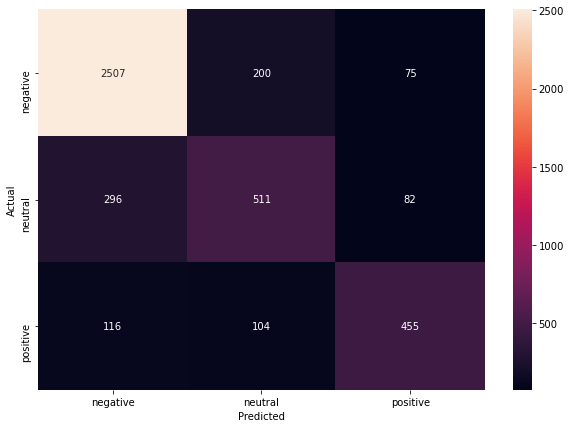

In [31]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g');

In [32]:
# Using TfidfVectorizer to convert text data to numbers.

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['text'])

data_features_df = pd.DataFrame(data = data_features.toarray(), 
                                columns = vectorizer.get_feature_names())

data_features_df.head()

,aa,able,absolute,absolutely,accept,acceptable,access,accommodate,account,act,actual,actually,add,additional,address,advise,advisory,afternoon,agent,ago,ahead,air,aircraft,airline,airplane,airport,airway,alert,allow,almost,alone,along,already,also,always,amaze,america,american,americanair,americanairlines,amount,angry,announce,announcement,another,answer,anymore,anyone,anything,anyway,anywhere,apology,app,apparently,appear,appease,apply,appreciate,area,around,arrival,arrive,arrives,ask,assign,assist,assistance,atl,atlanta,attempt,attendant,attitude,austin,auto,automate,available,avgeek,avoid,award,away,awesome,awful,baby,back,bad,badcustomerservice,badservice,bag,baggage,bank,base,battle,bc,become,begin,behind,believe,best,better,beyond,big,bin,bird,birthday,bit,blame,blue,bna,board,boarding,book,bos,boston,bother,bought,break,bring,broke,broken,brother,btw,bumped,bus,business,busy,buy,bwi,cabin,call,callback,cancel,captain,car,card,care,carrier,carry,carryon,case,catch,catering,cause,cc,center,ceo,chairman,chance,change,charge,charlotte,cheap,check,checked,checkin,chicago,child,choice,choose,city,claim,class,clean,clear,clearly,close,clothes,clt,club,coach,code,coffee,cold,columbus,come,commercial,communication,companion,company,compensate,compensation,complain,complaint,complete,completely,computer,concern,condition,conf,confirm,confirmation,congrats,connect,connection,consider,contact,continue,control,cool,correct,cost,could,count,counter,counting,country,couple,course,cover,crazy,credit,crew,cross,current,currently,cust,customer,customerservice,cut,daily,dallas,damage,damn,date,daughter,day,dc,dca,deal,decide,definitely,degree,deice,delay,delayed,deliver,delivery,delta,den,denver,deny,depart,department,departure,deplane,dept,desk,despite,destination,destinationdragons,detail,dfw,die,diego,diff,difference,different,direct,disappoint,disappointed,disconnect,discount,disgust,dividend,dm,dmed,do,dollar,domestic,door,dragon,drink,drive,drop,due,earlier,early,earn,easy,eat,effort,either,else,email,emergency,employee,empty,end,engine,enjoy,enough,enter,entertainment,entire,equipment,error,especially,etc,even,event,ever,every,everyone,everything,ewr,exactly,excellent,except,excite,excuse,exit,expect,expensive,experience,experienced,expire,explain,explanation,extend,extra,extremely,fa,face,fact,fail,failure,fair,fall,family,fan,fantastic,far,fare,fast,fault,favorite,feb,february,fee,feedback,feel,figure,file,fill,final,finally,find,fine,finger,first,fit,fix,fl,fleek,fleet,flew,flight,flightd,flightlation,flightlations,flightled,flightling,flightr,fll,florida,flown,flt,fly,flyer,folk,follow,food,foot,force,forever,forgot,form,forward,found,four,free,freeze,frequent,friday,friend,friendly,front,frustrate,fuck,full,fun,funeral,funny,future,fyi,game,gate,get,give,glad,go,god,gold,good,gotten,great,ground,group,guess,guy,haha,half,hand,handle,hang,happen,happens,happy,hard,hate,head,hear,heard,held,hell,hello,help,helpful,hey,hi,high,hire,hit,hold,home,honor,hop,hope,hopefully,horrible,hotel,hour,houston,however,hr,huge,human,hung,husband,iad,iah,ice,id,idea,ignore,imagine,imaginedragons,important,impossible,impressed,improve,include,inconvenience,infant,inflight,info,inform,information,inside,instead,international,internet,intl,issue,item,itinerary,jet,jetblue,jfk,job,joke,keep,kept,kid,kill,kind,knew,know,kudos,la,lack,lady,land,last,late,lax,layover,le,leaf,learn,least,leave,left,leg,let,letter,level,lga,lie,life,like,likely,line,link,list,listen,literally,little,live,load,locate,log,lol,long,longer,look,lose,lot,lounge,love,lovely,loyal,luck,luggage,mail,maintenance,major,make,man,manage,many,march,match,matter,may,maybe,mco,meal,mean,mechanical,medium,meeting,member,mention,merge,merger,mess,message,mexico,mia,miami,middle,midnight,might,mile,mileage,mileageplus,min,mind,mine,minute,miss,mistake,mobile,mom,monday,money,month,morning,move,much,multiple,music,must,name,nashville,nc,nd,need,never,neveragain,new,newark,news,next,nice,n

In [33]:
X = data_features_df
y = data['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
lg = LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'liblinear').fit(X_train, y_train)

print(lg.score(X_train, y_train))
print(lg.score(X_test, y_test))

0.8137883420455666
0.7942936033133916


In [35]:
result = lg.predict(X_test)

In [36]:
# Confusion matrix
cm = pd.crosstab(y_test, result, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,negative,neutral,positive
Actual,,,
negative,2573,152,57
neutral,371,455,63
positive,153,98,424


In [38]:
###### For automated model selection
#! sudo pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
import h2o
from h2o.automl import H2OAutoML

# Start H2O cluster
h2o.init(max_mem_size = 24, nthreads = 4)
#h2o.init(max_mem_size = 24)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,28 mins 45 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_silver_moon_atdben
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.607 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [43]:
###### vectorizer = CountVectorizer(max_features=5000)                # Keep only 5000 features as number of features will increase the processing time.
vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['text'])

data_features_df = pd.DataFrame(data = data_features.toarray(), 
                                columns = vectorizer.get_feature_names())     

features = data_features_df.columns
data_features_df['label'] = data['airline_sentiment']

data_features_df.head()

,aa,able,absolute,absolutely,accept,acceptable,access,accommodate,account,act,actual,actually,add,additional,address,advise,advisory,afternoon,agent,ago,ahead,air,aircraft,airline,airplane,airport,airway,alert,allow,almost,alone,along,already,also,always,amaze,america,american,americanair,americanairlines,amount,angry,announce,announcement,another,answer,anymore,anyone,anything,anyway,anywhere,apology,app,apparently,appear,appease,apply,appreciate,area,around,arrival,arrive,arrives,ask,assign,assist,assistance,atl,atlanta,attempt,attendant,attitude,austin,auto,automate,available,avgeek,avoid,award,away,awesome,awful,baby,back,bad,badcustomerservice,badservice,bag,baggage,bank,base,battle,bc,become,begin,behind,believe,best,better,beyond,big,bin,bird,birthday,bit,blame,blue,bna,board,boarding,book,bos,boston,bother,bought,break,bring,broke,broken,brother,btw,bumped,bus,business,busy,buy,bwi,cabin,call,callback,cancel,captain,car,card,care,carrier,carry,carryon,case,catch,catering,cause,cc,center,ceo,chairman,chance,change,charge,charlotte,cheap,check,checked,checkin,chicago,child,choice,choose,city,claim,class,clean,clear,clearly,close,clothes,clt,club,coach,code,coffee,cold,columbus,come,commercial,communication,companion,company,compensate,compensation,complain,complaint,complete,completely,computer,concern,condition,conf,confirm,confirmation,congrats,connect,connection,consider,contact,continue,control,cool,correct,cost,could,count,counter,counting,country,couple,course,cover,crazy,credit,crew,cross,current,currently,cust,customer,customerservice,cut,daily,dallas,damage,damn,date,daughter,day,dc,dca,deal,decide,definitely,degree,deice,delay,delayed,deliver,delivery,delta,den,denver,deny,depart,department,departure,deplane,dept,desk,despite,destination,destinationdragons,detail,dfw,die,diego,diff,difference,different,direct,disappoint,disappointed,disconnect,discount,disgust,dividend,dm,dmed,do,dollar,domestic,door,dragon,drink,drive,drop,due,earlier,early,earn,easy,eat,effort,either,else,email,emergency,employee,empty,end,engine,enjoy,enough,enter,entertainment,entire,equipment,error,especially,etc,even,event,ever,every,everyone,everything,ewr,exactly,excellent,except,excite,excuse,exit,expect,expensive,experience,experienced,expire,explain,explanation,extend,extra,extremely,fa,face,fact,fail,failure,fair,fall,family,fan,fantastic,far,fare,fast,fault,favorite,feb,february,fee,feedback,feel,figure,file,fill,final,finally,find,fine,finger,first,fit,fix,fl,fleek,fleet,flew,flight,flightd,flightlation,flightlations,flightled,flightling,flightr,fll,florida,flown,flt,fly,flyer,folk,follow,food,foot,force,forever,forgot,form,forward,found,four,free,freeze,frequent,friday,friend,friendly,front,frustrate,fuck,full,fun,funeral,funny,future,fyi,game,gate,get,give,glad,go,god,gold,good,gotten,great,ground,group,guess,guy,haha,half,hand,handle,hang,happen,happens,happy,hard,hate,head,hear,heard,held,hell,hello,help,helpful,hey,hi,high,hire,hit,hold,home,honor,hop,hope,hopefully,horrible,hotel,hour,houston,however,hr,huge,human,hung,husband,iad,iah,ice,id,idea,ignore,imagine,imaginedragons,important,impossible,impressed,improve,include,inconvenience,infant,inflight,info,inform,information,inside,instead,international,internet,intl,issue,item,itinerary,jet,jetblue,jfk,job,joke,keep,kept,kid,kill,kind,knew,know,kudos,la,lack,lady,land,last,late,lax,layover,le,leaf,learn,least,leave,left,leg,let,letter,level,lga,lie,life,like,likely,line,link,list,listen,literally,little,live,load,locate,log,lol,long,longer,look,lose,lot,lounge,love,lovely,loyal,luck,luggage,mail,maintenance,major,make,man,manage,many,march,match,matter,may,maybe,mco,meal,mean,mechanical,medium,meeting,member,mention,merge,merger,mess,message,mexico,mia,miami,middle,midnight,might,mile,mileage,mileageplus,min,mind,mine,minute,miss,mistake,mobile,mom,monday,money,month,morning,move,much,multiple,music,must,name,nashville,nc,nd,need,never,neveragain,new,newark,news,next,nice,n

In [44]:
# Split all data into train and test sets
train, test = train_test_split(data_features_df, test_size=0.3, random_state=42)

In [45]:
# Convert pandas tables into H2O tables
h2o_train = h2o.H2OFrame(train)
h2o_test = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [46]:
%%time
# Define and train the model. By default the model will use cross-validation to tune hyperparameters and select best candidate models
h2o_model = H2OAutoML(max_models = 100, max_runtime_secs = 120, seed = 1)  # To select only deep learning models, add parameter  "include_algos = ['DeepLearning']""
h2o_model.train(x = list(features), 
                y = 'label', 
                training_frame = h2o_train,  
                leaderboard_frame = h2o_test)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 20.3 s, sys: 1.07 s, total: 21.3 s
Wall time: 2min 26s


In [47]:
h2o_model.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
StackedEnsemble_BestOfFamily_AutoML_20210430_234348,0.531578,0.650042,0.466844,0.217943,nan,nan
StackedEnsemble_AllModels_AutoML_20210430_234348,0.531777,0.649876,0.466961,0.218053,nan,nan
XGBoost_grid__1_AutoML_20210430_234348_model_1,0.547093,0.670235,0.474872,0.225503,nan,nan
GBM_3_AutoML_20210430_234348,0.592742,1.26944,0.718069,0.515623,nan,nan
XGBoost_1_AutoML_20210430_234348,0.594598,0.821375,0.542724,0.294549,nan,nan
XGBoost_2_AutoML_20210430_234348,0.598947,0.890812,0.574832,0.330432,nan,nan
GBM_4_AutoML_20210430_234348,0.600883,1.2694,0.718063,0.515614,nan,nan
XGBoost_3_AutoML_20210430_234348,0.612917,0.845483,0.552753,0.305535,nan,nan
GBM_1_AutoML_20210430_234348,0.613228,1.2783,0.720616,0.519287,nan,nan
GBM_grid__1_AutoML_20210430_234348_model_1,0.627212,0.957331,0.604574,0.36551,nan,nan


In [48]:
# Create predictions and store in a pandas dataframe
predictions = h2o_model.leader.predict(h2o_test)
predictions = predictions.as_data_frame()
predictions.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


,predict,nan,negative,neutral,positive
0,negative,0.003071,0.846174,0.113196,0.037558
1,negative,0.001455,0.419737,0.385756,0.193052
2,negative,0.001098,0.476403,0.406477,0.116022
3,neutral,0.001292,0.177695,0.530342,0.290671
4,neutral,0.012142,0.115034,0.669538,0.203285


In [49]:
test = test.reset_index().copy()

In [50]:
# Compare predictions with actuals
pd.crosstab(test['label'], predictions['predict'])

predict,negative,neutral,positive
label,,,
negative,2533,148,72
neutral,459,385,55
positive,197,112,342


In [51]:
# Accuracy
sum(test['label'] == predictions['predict'])/len(test)

0.7501150483202945

In [52]:
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercial experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guest face little recourse,negative
4,virginamerica really big bad thing,negative


In [53]:
negative_tweets = data[data['airline_sentiment']=='negative']
positive_tweets = data[data['airline_sentiment']=='positive']

In [54]:
negative_tweets.head()

,text,airline_sentiment
3,virginamerica really aggressive blast obnoxious entertainment guest face little recourse,negative
4,virginamerica really big bad thing,negative
5,virginamerica seriously would pay flight seat not play really bad thing fly va,negative
15,virginamerica sfopdx schedule still mia,negative
17,virginamerica flew nyc sfo last week could not fully sit seat due two large gentleman either side help,negative


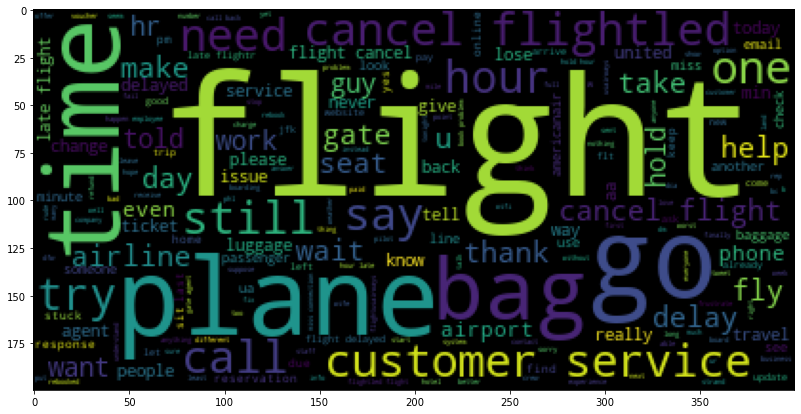

In [55]:
# Negative tweets wordcloud
plt.figure(figsize = (15,7))
plt.imshow(wordcloud.WordCloud().generate(negative_tweets['text'].sum()));

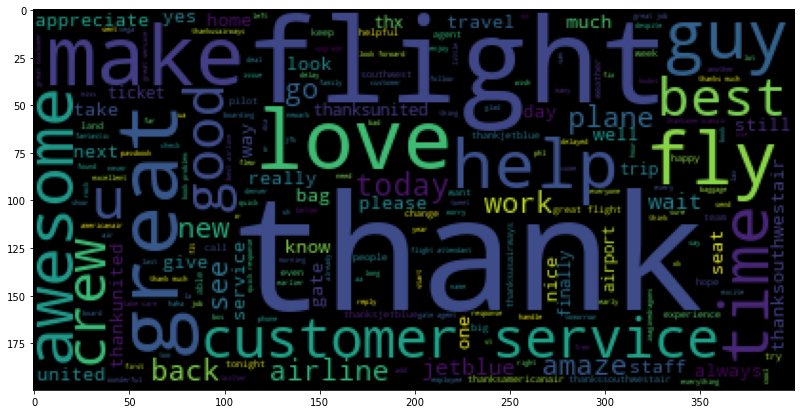

In [56]:
# Positive tweets wordcloud
plt.figure(figsize = (15,7))
plt.imshow(wordcloud.WordCloud().generate(positive_tweets['text'].sum()));

Summary:

- We used dataset which has tweets in text format and their sentiment type (positive, negative and neutral).
- The goal was to build a model for text-classification.
- We Pre-processed the data using variuos techniques and libraries.
- The pre-precessed data is converted to numbers, so that we can feed the data in the model.
- After building the classification model, we predicted the result for the test data.
- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- One more way to increase accuracy is to use different variations of Pre-processing techniques.